In [3]:
%matplotlib inline

import glob

import evident
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("./paper.mplstyle")

In [4]:
print(evident.__version__)

0.1.1


In [5]:
col_map = {
    "lung_disease": "Lung Disease",
    "kidney_disease": "Kidney Disease",
    "cardiovascular_disease": "Cardiovascular Disease",
    "liver_disease": "Liver Disease",
    "skin_condition": "Skin Condition",
    "ibd": "IBD",
    "ibs": "IBS",
    "asd": "ASD",
    "sex": "Sex",
    "mental_illness": "Mental Illness"
}

In [6]:
md = pd.read_table("../data/agp/metadata.filt.subset.tsv", sep="\t", index_col=0)
md = md.rename(columns=col_map)
md.head()

,Lung Disease,Kidney Disease,Cardiovascular Disease,Liver Disease,Skin Condition,IBD,IBS,ASD,Sex,Mental Illness
#SampleID,,,,,,,,,,
S10317.000070691,No,No,No,No,No,No,No,No,male,No
S10317.000060237,No,No,Yes,No,No,No,No,No,female,No
S10317.000075965,No,No,No,No,NaN,No,Yes,No,female,No
S10317.000008964,No,No,No,No,No,No,No,No,female,NaN
S10317.000013281,No,NaN,NaN,NaN,No,No,NaN,NaN,female,NaN


In [7]:
for col in md.columns:
    print(md[col].value_counts(), end="\n\n")

No     12130
Yes     1374
Name: Lung Disease, dtype: int64

No     11442
Yes      160
Name: Kidney Disease, dtype: int64

No     11284
Yes      295
Name: Cardiovascular Disease, dtype: int64

No     11135
Yes      167
Name: Liver Disease, dtype: int64

No     10149
Yes     2786
Name: Skin Condition, dtype: int64

No     12518
Yes      746
Name: IBD, dtype: int64

No     9013
Yes    1567
Name: IBS, dtype: int64

No     11406
Yes       73
Name: ASD, dtype: int64

female    7266
male      6647
Name: Sex, dtype: int64

No     7678
Yes    1329
Name: Mental Illness, dtype: int64



In [8]:
es_df = pd.read_table("../results/agp/beta_effect_size_by_cat.tsv", sep="\t", index_col=0)
es_df["column"] = es_df["column"].map(col_map)
es_df

,effect_size,metric,column
0,0.307492,cohens_d,IBD
1,0.190922,cohens_d,ASD
2,0.185853,cohens_d,IBS
3,0.176694,cohens_d,Sex
4,0.146177,cohens_d,Kidney Disease
5,0.055167,cohens_d,Liver Disease
6,0.052913,cohens_d,Mental Illness
7,0.050776,cohens_d,Lung Disease
8,0.050455,cohens_d,Skin Condition
9,0.013832,cohens_d,Cardiovascular Disease


In [9]:
order = es_df["column"]

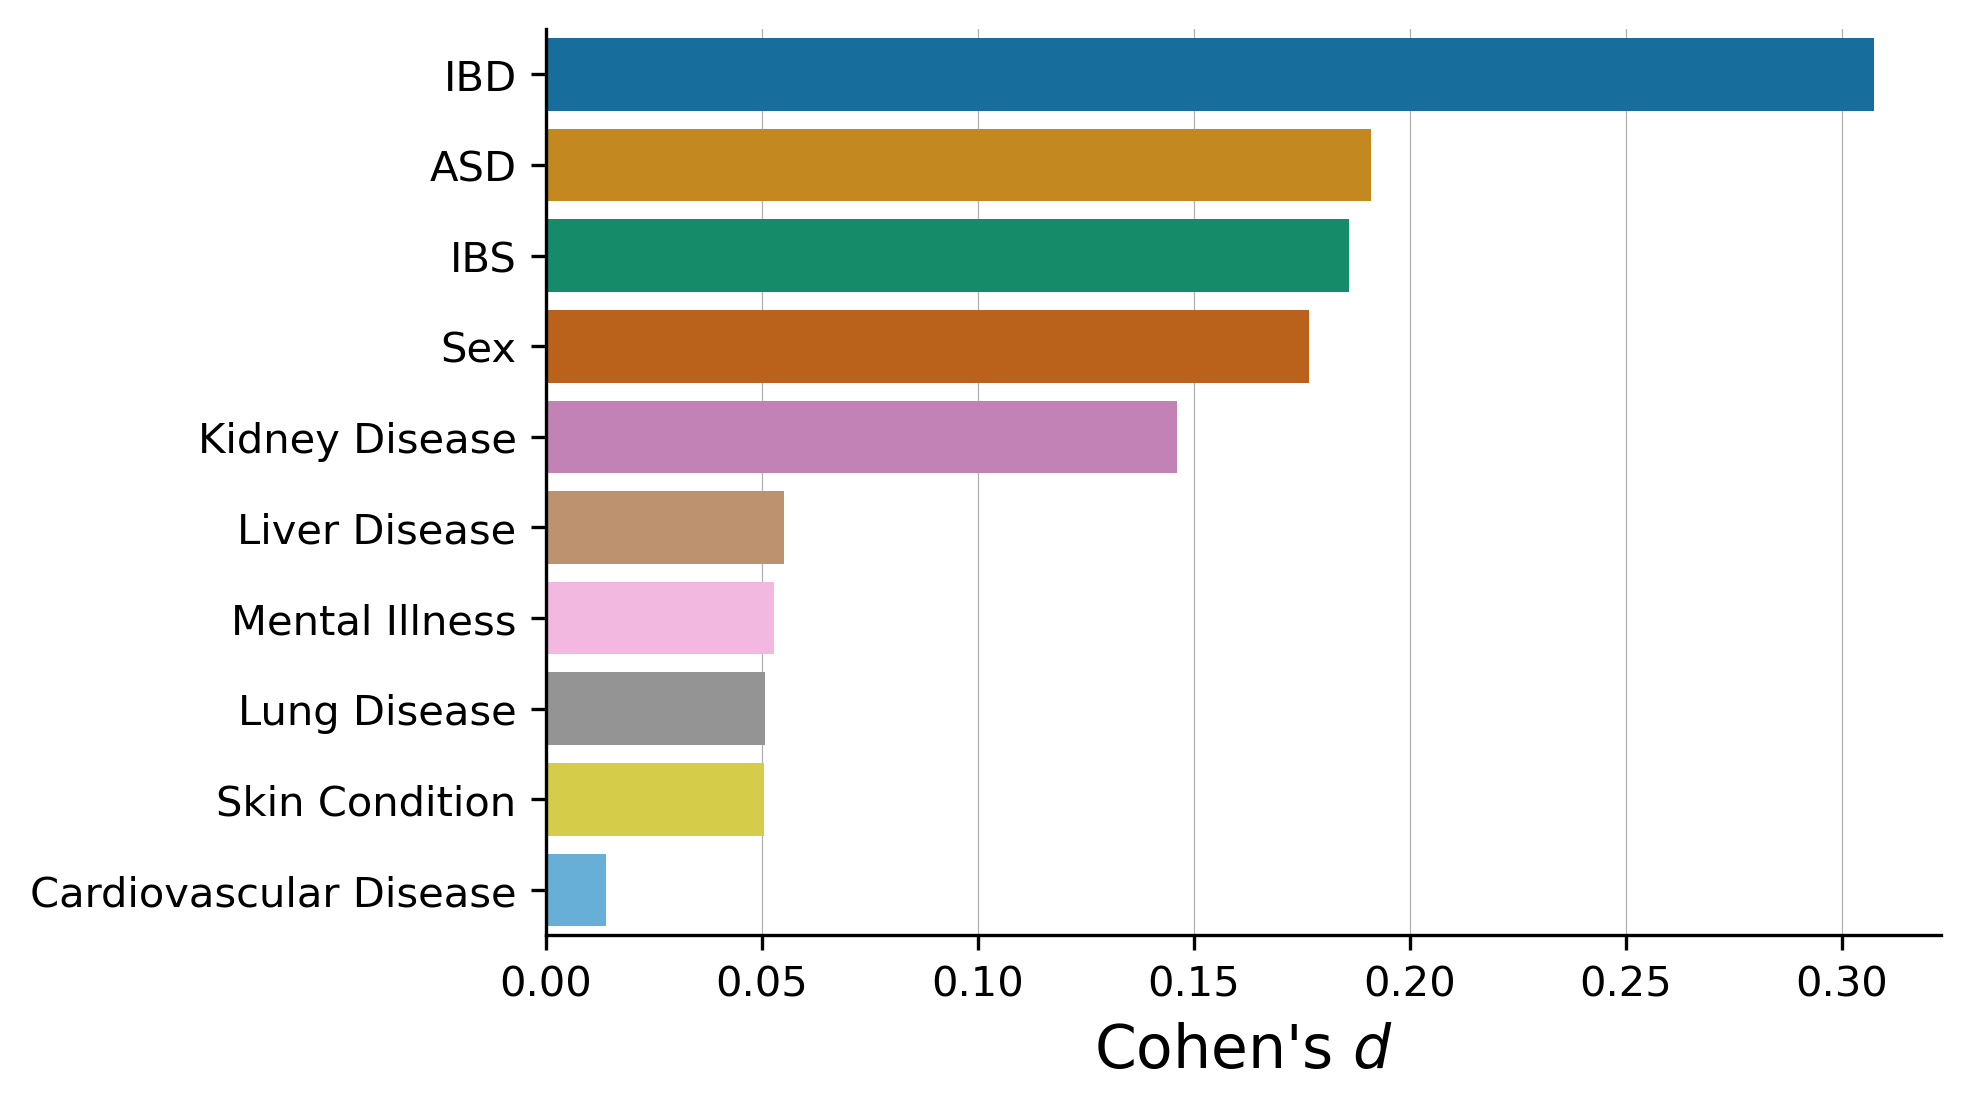

In [10]:
fig, ax = plt.subplots()

sns.barplot(
    data=es_df,
    y="column",
    x="effect_size",
    palette="colorblind",
    order=order,
    ax=ax
)

ax.grid(which="major", axis="x", zorder=0, lw=0.3)
ax.set_axisbelow(True)

ax.set_xlabel("Cohen's $d$", fontsize="x-large")
ax.set_ylabel("")

plt.show()

In [11]:
power_dfs = []

for f in glob.glob("../results/agp/power/*.tsv"):
    _df = pd.read_table(f, sep="\t", index_col=0)
    _df = _df[["alpha", "total_observations", "power", "column", "effect_size"]]
    power_dfs.append(_df)
    
power_df = (
    pd.concat(power_dfs)
    .reset_index(drop=True)
)
power_df["column"] = power_df["column"].map(col_map)
power_df

,alpha,total_observations,power,column,effect_size
0,0.01,20,0.010474,Liver Disease,0.055167
1,0.05,20,0.051567,Liver Disease,0.055167
2,0.10,20,0.102392,Liver Disease,0.055167
3,0.01,40,0.011048,Liver Disease,0.055167
4,0.05,40,0.053321,Liver Disease,0.055167
...,...,...,...,...,...
745,0.05,480,0.919493,IBD,0.307492
746,0.10,480,0.957173,IBD,0.307492
747,0.01,500,0.802499,IBD,0.307492
748,0.05,500,0.929391,IBD,0.307492


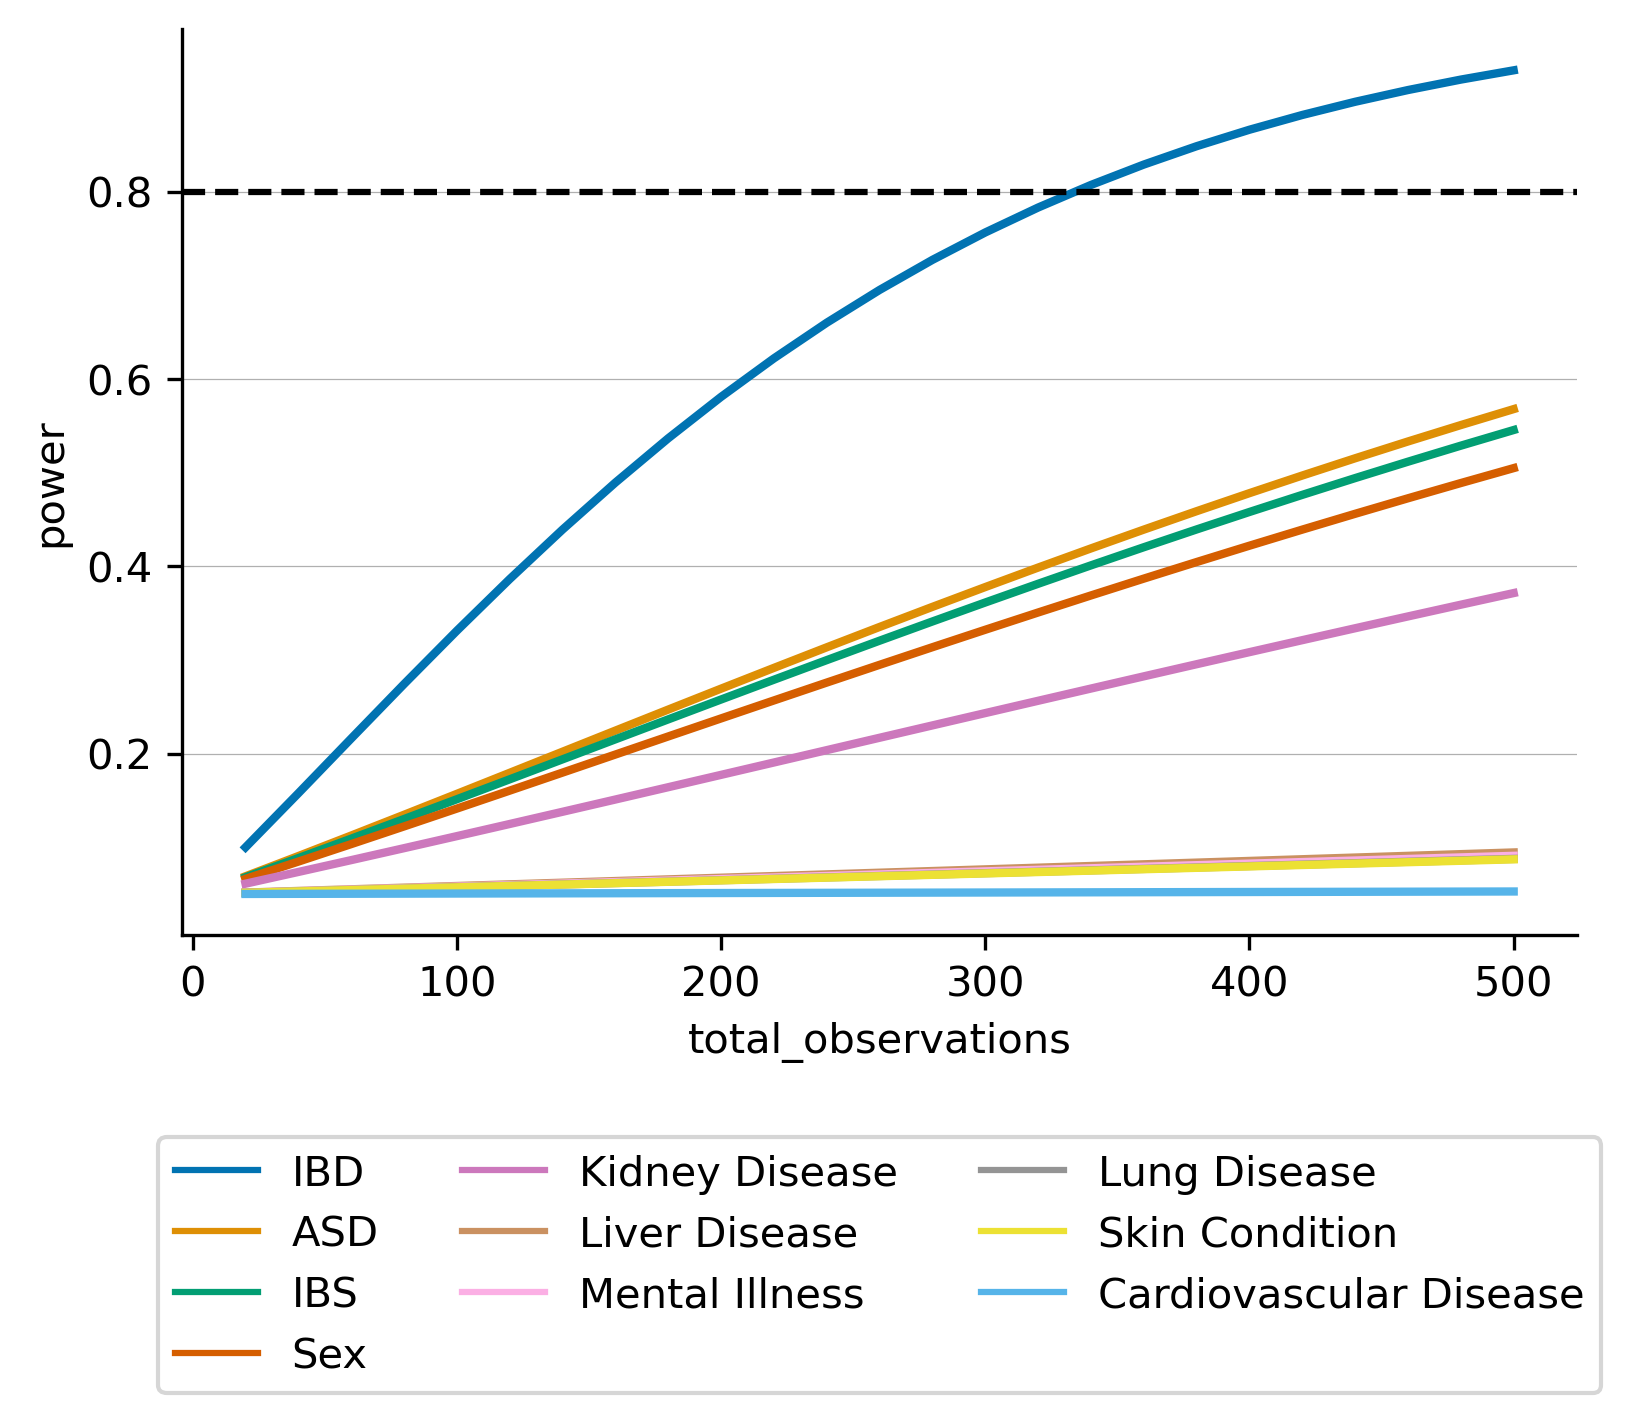

In [12]:
fig, ax = plt.subplots(1, 1)

_df = power_df.query("alpha == 0.05")

sns.lineplot(
    data=_df,
    x="total_observations",
    y="power",
    hue="column",
    palette="colorblind",
    hue_order=order,
    lw=2,
    ax=ax
)

xmin, xmax = ax.get_xlim()

ax.axhline(0.8, ls="--", color="black")
ax.grid(axis="y", lw=0.3)
ax.set_axisbelow(True)

ax.legend(
    loc="upper center",
    bbox_to_anchor=[0.5, -0.2],
    ncol=3
)

plt.show()